# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = mouse_metadata.count()
number_of_mice["Mouse ID"]

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
number_of_unique_mice = dataset.loc[dataset.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
number_of_unique_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
number_of_unique_mice_table = dataset.loc[dataset["Mouse ID"] == "g989"]
number_of_unique_mice_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = dataset[dataset["Mouse ID"].isin(number_of_unique_mice) == False]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe_number_of_mice = clean_dataframe.count()
clean_dataframe_number_of_mice ["Mouse ID"]

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_table = dataset.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = summary_table["Tumor Volume (mm3)"].mean()
median_tumor_volume = summary_table["Tumor Volume (mm3)"].median()
variance_tumor_volume = summary_table["Tumor Volume (mm3)"].var()
standarddeviation_tumor_volume = summary_table["Tumor Volume (mm3)"].std()
standard_error_mean_tumor_volume = summary_table ["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_dataframe = pd.DataFrame({
    "Mean": mean_tumor_volume, 
    "Median": median_tumor_volume, 
    "Variance": variance_tumor_volume, 
    "Standard Deviation": standarddeviation_tumor_volume,
    "SEM": standard_error_mean_tumor_volume})
summary_dataframe



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_table_aggregation = dataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table_aggregation



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas = dataset["Drug Regimen"].value_counts()
bar_plot_pandas.plot(kind= "bar", width = 0.6)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Observed Mice Timepoints")
plt.show()



In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_plot_pyplot = dataset["Drug Regimen"].value_counts()
plt.bar(bar_plot_pyplot.index.values, bar_plot_pyplot.values, width = 0.6)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("Number of Observed Mice Timepoints")
plt.show()


<Axes: ylabel='Sex'>

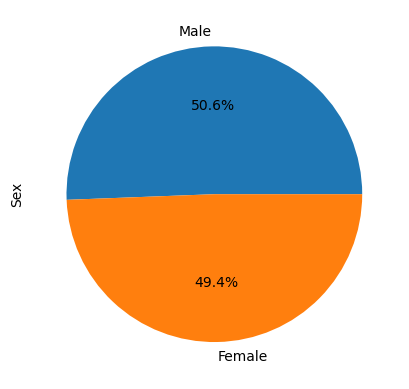

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot_pandas = dataset["Sex"].value_counts()
pie_plot_pandas.plot(kind= "pie", autopct = "%1.1f%%")




([<matplotlib.patches.Wedge at 0x7fb021d92830>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

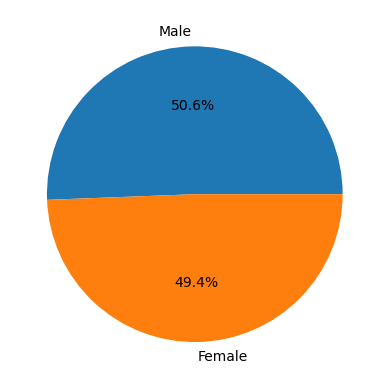

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot_pyplot = dataset["Sex"].value_counts()
plt.pie(pie_plot_pyplot, labels= pie_plot_pyplot.index.values, autopct = "%1.1f%%")


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = dataset.groupby(["Mouse ID"])["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint_merged = pd.merge(greatest_timepoint, dataset, on = ["Mouse ID", "Timepoint"], how = "left")
print(greatest_timepoint_merged.head())

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset

four_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

four_drug_regimen = []
for drug_regimen in four_drugs:
    tumor_volume = greatest_timepoint_merged.loc[greatest_timepoint_merged["Drug Regimen"]== drug_regimen, "Tumor Volume (mm3)"]
    four_drug_regimen.append(tumor_volume)

    quartiles = tumor_volume.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile - lower_quartile
    
# Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers = greatest_timepoint_merged.loc[(greatest_timepoint_merged["Tumor Volume (mm3)"]<= lower_bound) | (greatest_timepoint_merged ["Tumor Volume (mm3)"] >= upper_bound)]



([<matplotlib.axis.XTick at 0x7fb02830fc70>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

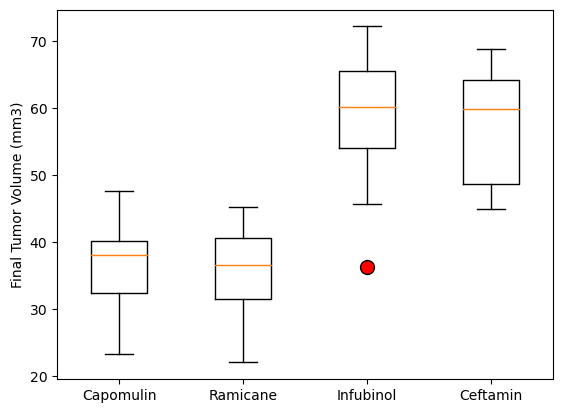

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
marker_dot = dict(markerfacecolor = "r", markersize = 10)
plt.boxplot(four_drug_regimen, flierprops = marker_dot)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

TypeError: 'str' object is not callable

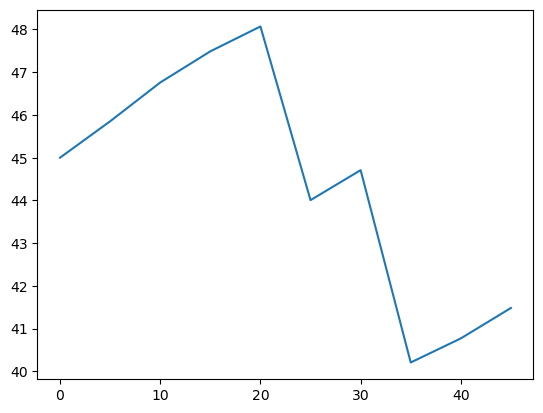

In [122]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = dataset.loc[dataset["Drug Regimen"] == "Capomulin",:]
capomulin_line_plot = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "l509",:]
capomulin_line_plot.head()
x_axis = capomulin_line_plot["Timepoint"]
tumor_volume_line = capomulin_line_plot["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_volume_line)
plt.title = "Capomulin treatment of mouse l509"
plt.xlabel ("Timepoint (days)")
plt.ylabel ("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor Volume (mm3)')

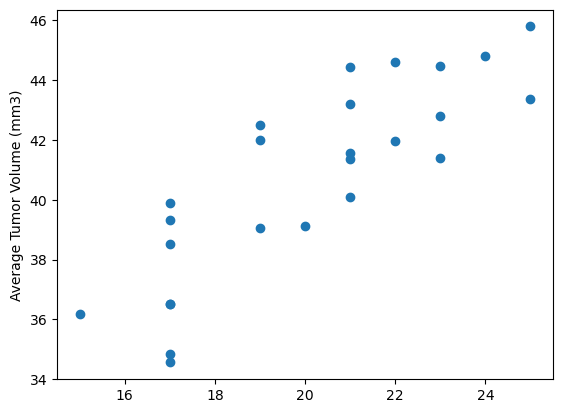

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_dataframe = dataset.loc[dataset["Drug Regimen"] == "Capomulin"]
average_tumor = pd.DataFrame(capomulin_dataframe.groupby("Mouse ID") ["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns = {"Tumor Volume (mm3)": "averaged_tumor"})
average_tumor = pd.merge(capomulin_dataframe, average_tumor, on = "Mouse ID")
capomulin_scatter_plot = average_tumor[["Weight (g)", "averaged_tumor"]].drop_duplicates()

x_axis = capomulin_scatter_plot["Weight (g)"]
y_axis = capomulin_scatter_plot["averaged_tumor"]

plt.scatter(x_axis,y_axis)
plt.xlabel = ("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


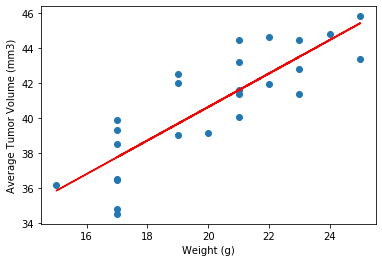

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

